![NYC Skyline](img/nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many [Airbnb](https://www.airbnb.com/) listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this notebook, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

Our goals are to convert untidy data into appropriate formats to analyze, and answer key questions including:

- What is the average price, per night, of an Airbnb listing in NYC?
- How does the average price of an Airbnb listing, per month, compare to the private rental market?
- How many adverts are for private rooms?
- How do Airbnb listing prices compare across the five NYC boroughs?


In [28]:
#importing packages and loading dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
airbnb_price=pd.read_csv("airbnb_price.csv")
airbnb_room_type=pd.read_excel("airbnb_room_type.xlsx")
airbnb_review=pd.read_csv("airbnb_last_review.tsv", sep='\t')

print(airbnb_price.head())
print('\n')
print(airbnb_room_type.head())
print('\n')
print(airbnb_review.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown


   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt


   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          

### 1.What is the average price, per night, of an Airbnb listing in NYC?

In [2]:
airbnb_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [3]:
#Removing whitespace and string characters from prices column
airbnb_price["price"]=airbnb_price["price"].str.rstrip("dollars")
print(airbnb_price.head())

   listing_id price                nbhood_full
0        2595  225          Manhattan, Midtown
1        3831   89      Brooklyn, Clinton Hill
2        5099  200      Manhattan, Murray Hill
3        5178   79   Manhattan, Hell's Kitchen
4        5238  150        Manhattan, Chinatown


In [4]:
#checking data type for price column
print(airbnb_price["price"].dtype)
# Convert data type to numeric
airbnb_price["price"]=airbnb_price["price"].astype(int)

object


In [5]:
print(airbnb_price["price"].dtype)

int32


In [6]:
#Print descriptive statistics for the price column
print(airbnb_price["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


In [7]:
#prices for listings costing $0, free_listings
free_listing=airbnb_price[airbnb_price["price"]==0]
#removing all free listings from price column
airbnb_price["price"]=airbnb_price["price"].drop(free_listing.index)

In [8]:
#calculating average price per night
Avg_airbnb_price=airbnb_price["price"].mean()
Avg_airbnb_price=round(Avg_airbnb_price,2)
print(f"The average price per night for an Airbnb listing in NYC is ${Avg_airbnb_price}")

The average price per night for an Airbnb listing in NYC is $141.82


###  2.How does the average price of an Airbnb listing, per month, compare to the private rental market?

In [9]:
# Add a new column to the prices DataFrame, price_per_month
airbnb_price["price_per_month"] = airbnb_price["price"] * 365 / 12

# Calculate average_price_per_month
avg_price_per_month = round(airbnb_price["price_per_month"].mean(), 2)

# Compare monthly Airbnb and rental market price assuming average rental market price is $3000 in NY
print(f"The average airbnb monthly costs in NY is ${avg_price_per_month}, and the private market price is approximately $3000")

The average airbnb monthly costs in NY is $4313.61, and the private market price is approximately $3000


###  3. How many adverts are for private rooms?

In [10]:
#lets print the room type dataset
print(airbnb_room_type.head())

   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt


In [11]:
#checking the frequencies of room type column
airbnb_room_type.room_type.value_counts()

Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

In [12]:
# Convert the room_type column to lowercase
airbnb_room_type["room_type"] = airbnb_room_type["room_type"].str.lower()

# Update the room_type column to category data type
airbnb_room_type["room_type"] = airbnb_room_type["room_type"].astype("category")

# Create the variable room_frequencies
room_frequencies = airbnb_room_type["room_type"].value_counts()

# Print room_frequencies
print(room_frequencies)

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64


###  4. How do Airbnb listing prices compare across the five NYC boroughs?

In [13]:
print(airbnb_review.head())

   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019


In [14]:
print(airbnb_review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None


In [15]:
# Change the data type of the last_review column to datetime
airbnb_review["last_review"] = pd.to_datetime(airbnb_review["last_review"] )

# Create first_reviewed, the earliest review date
first_reviewed = airbnb_review["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = airbnb_review["last_review"].dt.date.max()

# Print the oldest and newest reviews from the DataFrame
print(f"The latest Airbnb review is {last_reviewed}, the earliest review is {first_reviewed}") 

The latest Airbnb review is 2019-07-09, the earliest review is 2019-01-01


In [16]:
#Joining the DataFrames
# Merge prices and room_types to create rooms_and_prices
rooms_and_prices = airbnb_price.merge(airbnb_room_type, how="outer", on="listing_id")

# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged
airbnb_merged = rooms_and_prices.merge(airbnb_review, how="outer", on="listing_id")

# Drop missing values from airbnb_merged
airbnb_merged.dropna(inplace=True)

# Check if there are any duplicate values
print("There are {} duplicates in the DataFrame.".format(airbnb_merged.duplicated().sum()))

There are 0 duplicates in the DataFrame.


In [17]:
print(airbnb_merged.head())

   listing_id  price                nbhood_full  price_per_month  \
0        2595  225.0         Manhattan, Midtown      6843.750000   
1        3831   89.0     Brooklyn, Clinton Hill      2707.083333   
2        5099  200.0     Manhattan, Murray Hill      6083.333333   
3        5178   79.0  Manhattan, Hell's Kitchen      2402.916667   
4        5238  150.0       Manhattan, Chinatown      4562.500000   

                                 description        room_type    host_name  \
0                      Skylit Midtown Castle  entire home/apt     Jennifer   
1            Cozy Entire Floor of Brownstone  entire home/apt  LisaRoxanne   
2  Large Cozy 1 BR Apartment In Midtown East  entire home/apt        Chris   
3            Large Furnished Room Near B'way     private room     Shunichi   
4         Cute & Cozy Lower East Side 1 bdrm  entire home/apt          Ben   

  last_review  
0  2019-05-21  
1  2019-07-05  
2  2019-06-22  
3  2019-06-24  
4  2019-06-09  


### Analyzing listing prices by NYC borough

In [20]:
# Extract information from the nbhood_full column and store as a new column, borough
airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",")[0]
# Group by borough and calculate summary statistics
boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)
# Step 9. Price range by borough
print(boroughs)

                     sum    mean  median  count
borough                                        
Manhattan      1898417.0  184.04   149.0  10315
Brooklyn       1275250.0  122.02    95.0  10451
Queens          320715.0   92.83    70.0   3455
Staten Island    22974.0   86.04    71.0    267
Bronx            55156.0   79.25    65.0    696


In [24]:
# Create labels for the price range, label_names
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]
# Insert new column, price_range, into DataFrame
airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)

# Calculate occurence frequencies for each label, prices_by_borough
prices_by_borough = airbnb_merged.groupby(["borough", "price_range"])["price_range"].count()

print(prices_by_borough)

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64


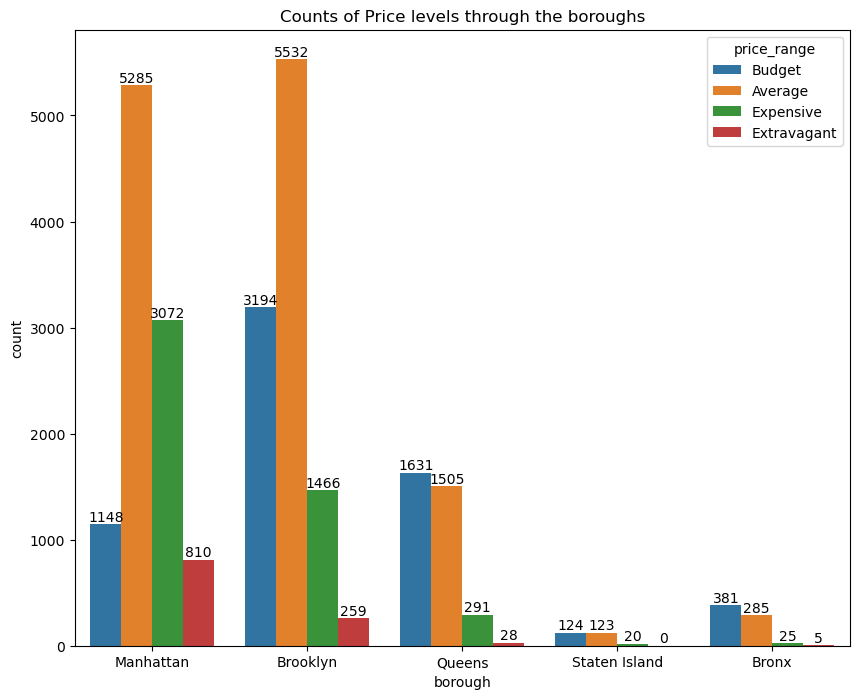

In [31]:
#plot a count plot of the boroughs regarding the different price ranges
plt.figure(figsize=[10, 8])
ax = sns.countplot(data=airbnb_merged, x="borough", hue="price_range", palette=sns.color_palette());
for container in ax.containers:
    ax.bar_label(container, )
plt.title("Counts of Price levels through the boroughs");